# Clustering (crime_data)
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Rohan Chaure/OneDrive/Desktop/Data Science Assignement/7.Clustering/crime_data.csv")

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
df.rename(columns = {'Unnamed: 0':'Place'}, inplace = True)

In [10]:
df.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [11]:
df.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

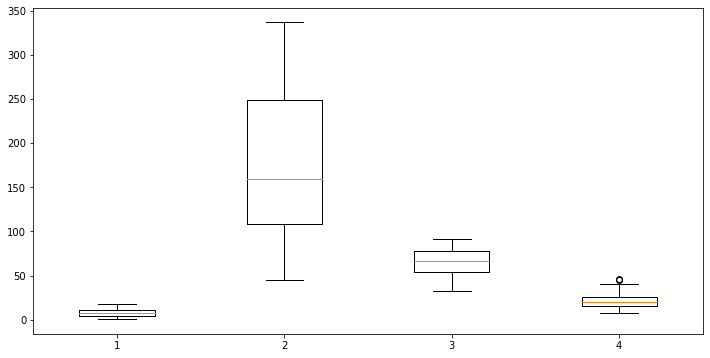

In [13]:
columns = [df['Murder'], df['Assault'], df['UrbanPop'], df['Rape']]

fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(columns)
plt.show()

# k means clustering

In [14]:
X = df.drop('Place',axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

In [17]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)

C:\Users\Rohan Chaure\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
distortions

[200.0,
 104.96163315756873,
 80.08569526137276,
 57.55425863091106,
 49.990529821335684,
 44.070226421674185,
 39.335118096468285,
 35.83727097461334,
 32.6502120089262]

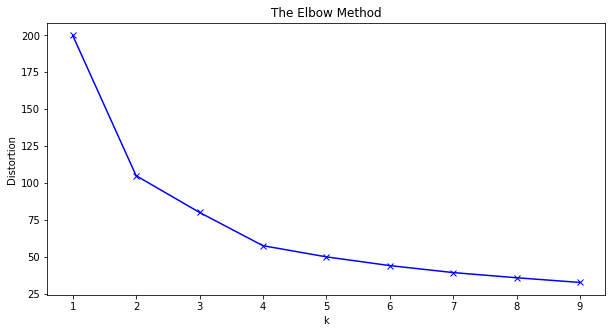

In [19]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [20]:
df.Place.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [21]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

KMeans(n_clusters=4)

In [22]:
kmeans.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

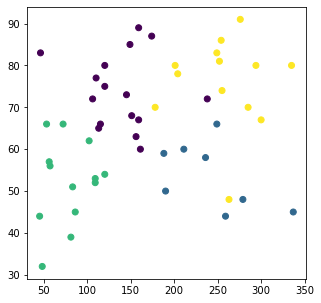

In [23]:
plt.figure(figsize=(5,5)) 
plt.scatter(X['Assault'],X['UrbanPop'],c=kmeans.labels_)

# Hierarchical clustering

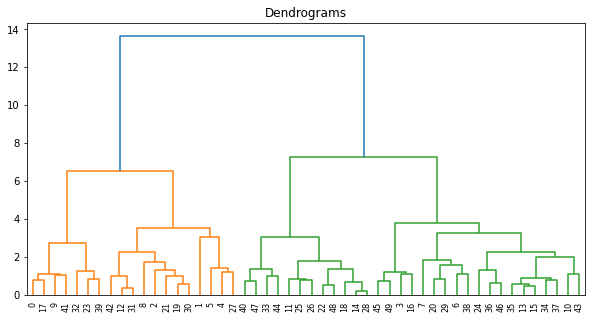

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_scaled)

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

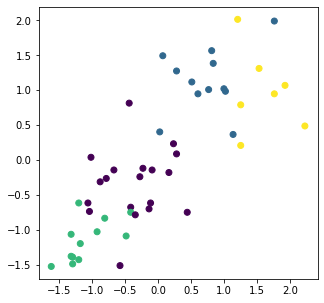

In [26]:
plt.figure(figsize=(5,5))  
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=cluster.labels_)

# DBSCAN clustering

C:\Users\Rohan Chaure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UrbanPop', ylabel='Assault'>

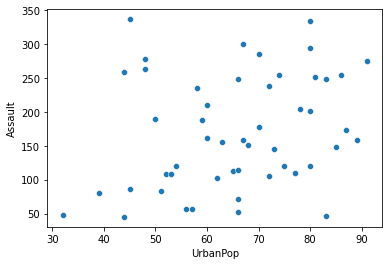

In [27]:
sns.scatterplot(df['UrbanPop'],df['Assault'])

In [28]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.7,min_samples=4)

In [29]:
model=dbscan.fit(X_scaled)
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  1, -1],
      dtype=int64)

C:\Users\Rohan Chaure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Assault', ylabel='UrbanPop'>

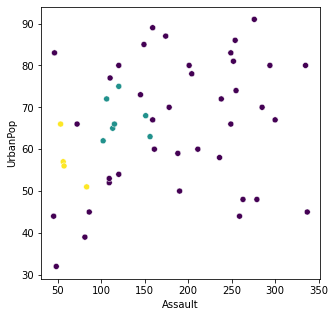

In [30]:
plt.figure(figsize=(5,5))  
sns.scatterplot(df['Assault'],df['UrbanPop'],c=model.labels_)